In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [2]:
df=pd.read_csv("dataframe_final.csv",sep=",")

In [7]:
df.drop(columns=["Tasa interanual del IPI"], inplace=True)

In [14]:
df_anova = df[["rain", "is_day", "Festiu","Valor"]]

### Welch’s Test

In [19]:
group_rain_0 = df[df['rain'] == 0]['Valor']
group_rain_1 = df[df['rain'] == 1]['Valor']

t_stat_rain, p_val_rain = stats.ttest_ind(group_rain_0, group_rain_1, equal_var=False)
print("Welch’s t-test (rain):")
print("t =", t_stat_rain)
print("p =", p_val_rain)

group_day_0 = df[df['is_day'] == 0]['Valor']
group_day_1 = df[df['is_day'] == 1]['Valor']

t_stat_day, p_val_day = stats.ttest_ind(group_day_0, group_day_1, equal_var=False)
print("Welch’s t-test (is_day):")
print("t =", t_stat_day)
print("p =", p_val_day)

group_festiu_0 = df[df['Festiu'] == 0]['Valor']
group_festiu_1 = df[df['Festiu'] == 1]['Valor']

t_stat_festiu, p_val_festiu = stats.ttest_ind(group_festiu_0, group_festiu_1, equal_var=False)
print("Welch’s t-test (Festiu):")
print("t =", t_stat_festiu)
print("p =", p_val_festiu)

Welch’s t-test (rain):
t = -7.440473126375821
p = 1.0100621704499002e-13
Welch’s t-test (is_day):
t = -124.23877187714108
p = 0.0
Welch’s t-test (Festiu):
t = 39.49708917291632
p = 0.0


Les tres variables categòriques analitzades tenen un impacte clar i fort sobre la variable contínua Valor.

### ANOVA

In [18]:
grups = [group['Valor'].values for name, group in df.groupby('Festiu')]
f_stat, p_value = stats.f_oneway(*grups)

print("ANOVA per Festiu:")
print("F =", f_stat)
print("p =", p_value)

grups = [group['Valor'].values for name, group in df.groupby('is_day')]
f_stat, p_value = stats.f_oneway(*grups)

print("ANOVA per és de dia:")
print("F =", f_stat)
print("p =", p_value)

grups = [group['Valor'].values for name, group in df.groupby('rain')]
f_stat, p_value = stats.f_oneway(*grups)

print("ANOVA per pluja:")
print("F =", f_stat)
print("p =", p_value)

ANOVA per Festiu:
F = 1005.4385906409951
p = 2.4406536930332503e-220
ANOVA per és de dia:
F = 15199.932457729636
p = 0.0
ANOVA per pluja:
F = 55.088392546461044
p = 1.1548990222707683e-13


Els valors F molt alts i els p-values pràcticament zero indiquen que les mitjanes del valor Valor difereixen molt significativament entre els grups de cada variable categòrica.

Això confirma que festiu, si és de dia o no, i pluja són factors molt importants que afecten el consum o la variable Valor.

ANOVA multifactorial

In [ ]:
# Assegura que les variables categòriques siguin de tipus 'category'
df['rain'] = df['rain'].astype('category')
df['Festiu'] = df['Festiu'].astype('category')
df['is_day'] = df['is_day'].astype('category')

model = smf.ols('Valor ~ C(rain) + C(Festiu) + C(is_day)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                 sum_sq        df             F         PR(>F)
C(rain)    4.409512e+10       1.0     14.391031   1.485331e-04
C(Festiu)  2.847909e+12       1.0    929.452930  7.224809e-204
C(is_day)  4.620975e+13       1.0  15081.169748   0.000000e+00
Residual   1.066376e+15  348026.0           NaN            NaN


### Post-hoc test Tukey HSD

In [ ]:
print("Festiu vs Valor:", pairwise_tukeyhsd(endog=df['Valor'], groups=df['Festiu'], alpha=0.05).summary())

print("Rain vs Valor:", pairwise_tukeyhsd(endog=df['Valor'], groups=df['rain'], alpha=0.05).summary())

print("És de dia vs Valor:", pairwise_tukeyhsd(endog=df['Valor'], groups=df['is_day'], alpha=0.05).summary())

Festiu vs Valor:      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
 False   True -15409.1114   0.0 -16361.5739 -14456.6488   True
--------------------------------------------------------------
Rain vs Valor:  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2  meandiff p-adj  lower    upper   reject
------------------------------------------------------
 False   True 1741.5637   0.0 1281.67 2201.4573   True
------------------------------------------------------
És de dia vs Valor:    Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj   lower      upper   reject
---------------------------------------------------------
 False   True 23207.131   0.0 22838.1969 23576.065   True
---------------------------------------------------------


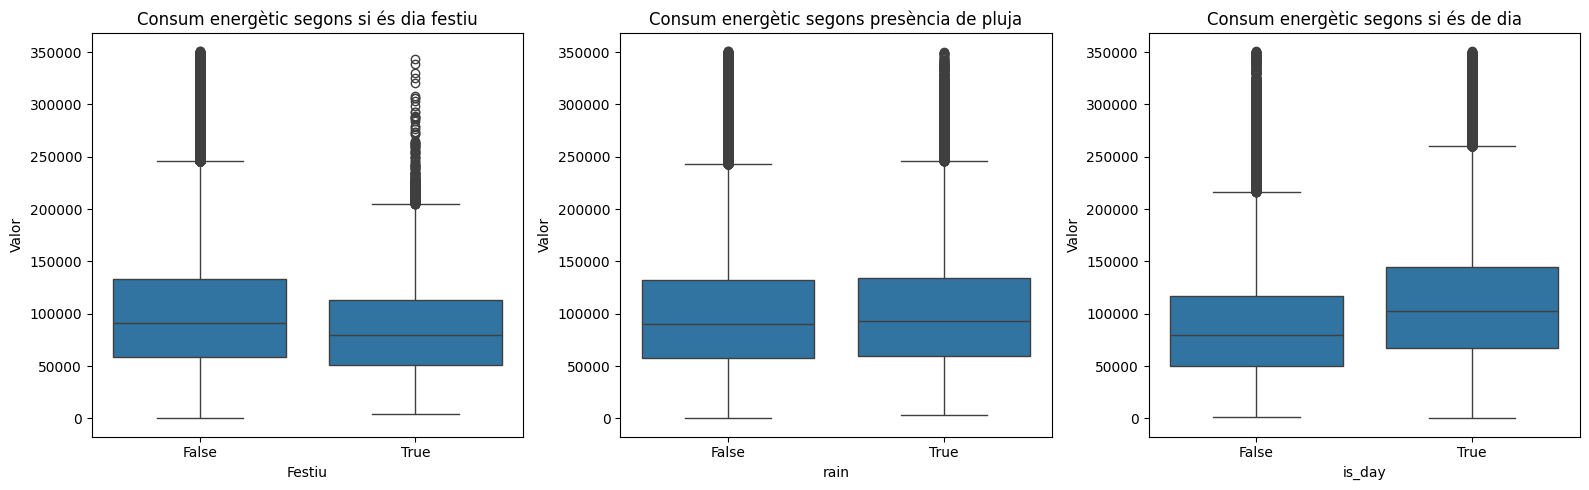

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))  # 1 fila, 3 columnes

# Boxplot per 'Festiu'
sns.boxplot(x='Festiu', y='Valor', data=df, ax=axes[0])
axes[0].set_title('Consum energètic segons si és dia festiu')

# Boxplot per 'rain'
sns.boxplot(x='rain', y='Valor', data=df, ax=axes[1])
axes[1].set_title('Consum energètic segons presència de pluja')

# Boxplot per 'is_day'
sns.boxplot(x='is_day', y='Valor', data=df, ax=axes[2])
axes[2].set_title('Consum energètic segons si és de dia')

plt.tight_layout()
plt.show()